# Optimizing Hospital Staffing and Workforce Management

In [65]:
#importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [66]:
df = pd.read_csv("hospital.csv")

In [67]:
df.head()

,year,facility_number,facility_name,begin_date,end_date,county_name,type_of_control,hours_type,productive_hours,productive_hours_per_adjusted_patient_day
0,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Management & Supervision,63558,1.17
1,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Technician & Specialist,163706,3.02
2,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Registered Nurse,180034,3.32
3,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Licensed Vocational Nurse,22323,0.41
4,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Aides & Orderlies,97205,1.79


In [68]:
df.isnull().sum()

year                                           0
facility_number                               68
facility_name                                 68
begin_date                                    68
end_date                                      68
county_name                                    0
type_of_control                               68
hours_type                                     0
productive_hours                               0
productive_hours_per_adjusted_patient_day    187
dtype: int64

In [62]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,year,facility_number,facility_name,begin_date,end_date,county_name,type_of_control,hours_type,productive_hours,productive_hours_per_adjusted_patient_day
7,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Other,NaN,NaN
13,2009,106010735.0,ALAMEDA HOSPITAL,7/1/2008,6/30/2009,Alameda,District,Education Cost Centers,NaN,NaN
54,2009,106010782.0,THUNDER ROAD CHEMICAL DEPENDENCY RECOVERY HOSP...,1/1/2009,12/31/2009,Alameda,Non-Profit,Licensed Vocational Nurse,NaN,NaN
58,2009,106010782.0,THUNDER ROAD CHEMICAL DEPENDENCY RECOVERY HOSP...,1/1/2009,12/31/2009,Alameda,Non-Profit,Other,NaN,NaN
63,2009,106010782.0,THUNDER ROAD CHEMICAL DEPENDENCY RECOVERY HOSP...,1/1/2009,12/31/2009,Alameda,Non-Profit,Ancillary Cost Centers,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
37549,2013,106571086.0,WOODLAND MEMORIAL HOSPITAL,7/1/2012,6/30/2013,Yolo,Non-Profit,Education Cost Centers,NaN,NaN
37556,2013,106574010.0,SUTTER DAVIS HOSPITAL,1/1/2013,12/31/2013,Yolo,Non-Profit,Licensed Vocational Nurse,NaN,NaN
37560,2013,106574010.0,SUTTER DAVIS HOSPITAL,1/1/2013,12/31/2013,Yolo,Non-Profit,Other,NaN,NaN
37566,2013,106574010.0,SUTTER DAVIS HOSPITAL,1/1/2013,12/31/2013,Yolo,Non-Profit,Education Cost Centers,NaN,NaN


In [69]:
df.dtypes

year                                           int64
facility_number                              float64
facility_name                                 object
begin_date                                    object
end_date                                      object
county_name                                   object
type_of_control                               object
hours_type                                    object
productive_hours                               int64
productive_hours_per_adjusted_patient_day    float64
dtype: object

In [70]:
df.dropna(inplace=True) 

In [71]:
df.isnull().sum()

year                                         0
facility_number                              0
facility_name                                0
begin_date                                   0
end_date                                     0
county_name                                  0
type_of_control                              0
hours_type                                   0
productive_hours                             0
productive_hours_per_adjusted_patient_day    0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37332 entries, 0 to 37586
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       37332 non-null  int64  
 1   facility_number                            37332 non-null  float64
 2   facility_name                              37332 non-null  object 
 3   begin_date                                 37332 non-null  object 
 4   end_date                                   37332 non-null  object 
 5   county_name                                37332 non-null  object 
 6   type_of_control                            37332 non-null  object 
 7   hours_type                                 37332 non-null  object 
 8   productive_hours                           37332 non-null  int64  
 9   productive_hours_per_adjusted_patient_day  37332 non-null  float64
dtypes: float64(2), int64(2

In [73]:
df.isnull().sum()

year                                         0
facility_number                              0
facility_name                                0
begin_date                                   0
end_date                                     0
county_name                                  0
type_of_control                              0
hours_type                                   0
productive_hours                             0
productive_hours_per_adjusted_patient_day    0
dtype: int64

In [12]:
df.describe()

,year,facility_number,productive_hours,productive_hours_per_adjusted_patient_day
count,37332.000000,3.733200e+04,3.733200e+04,37332.000000
mean,2010.987250,1.062804e+08,2.119600e+05,3.138356
std,1.412886,1.370779e+05,4.151058e+05,4.337675
min,2009.000000,1.060107e+08,0.000000e+00,0.000000
25%,2010.000000,1.061903e+08,8.224500e+03,0.230000
50%,2011.000000,1.063011e+08,6.347200e+04,1.750000
75%,2012.000000,1.063714e+08,2.216522e+05,4.420000
max,2013.000000,1.065810e+08,1.141998e+07,157.770000


In [11]:
df["type_of_control"] = df["type_of_control"].astype(str)

In [26]:
df.dtypes

year                                           int64
facility_number                              float64
facility_name                                 object
begin_date                                    object
end_date                                      object
county_name                                   object
type_of_control                               object
hours_type                                    object
productive_hours                               int64
productive_hours_per_adjusted_patient_day    float64
dtype: object

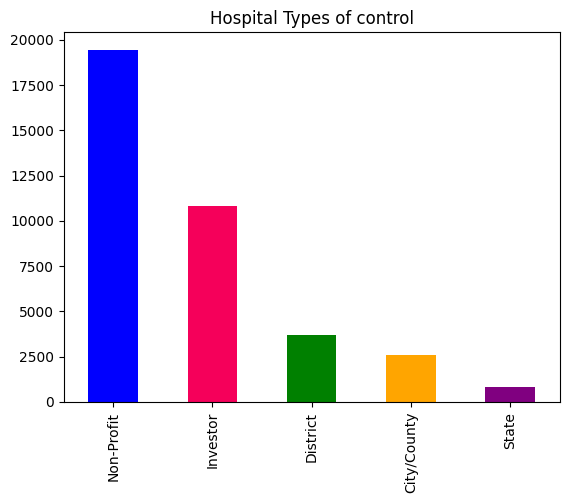

In [12]:
df["type_of_control"].value_counts().plot.bar(color=['blue', '#f5005a', 'green', 'orange', 'purple'], 
                                              title='Hospital Types of control');

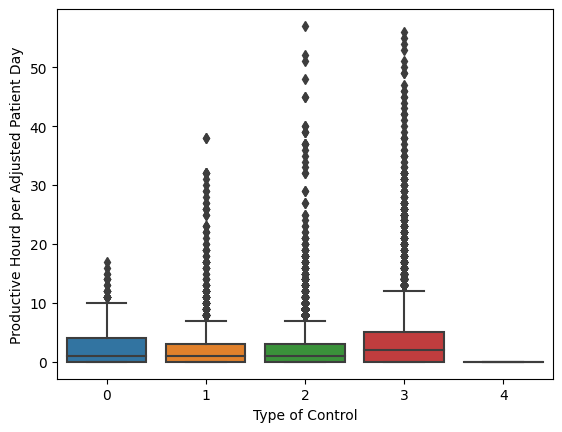

In [27]:
sns.boxplot(data=df, x="type_of_control", y="productive_hours_per_adjusted_patient_day")
plt.xlabel("Type of Control")
plt.ylabel("Productive Hourd per Adjusted Patient Day")
plt.show()

In [27]:
df.columns

Index(['year', 'facility_number', 'facility_name', 'begin_date', 'end_date',
       'county_name', 'type_of_control', 'hours_type', 'productive_hours',
       'productive_hours_per_adjusted_patient_day'],
      dtype='object')

In [28]:
# Identifying the unique number of values in the dataset
df.nunique()

year                                             5
facility_number                                462
facility_name                                  482
begin_date                                      60
end_date                                        64
county_name                                     56
type_of_control                                  5
hours_type                                      17
productive_hours                             29074
productive_hours_per_adjusted_patient_day     1970
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
df['year']=le.fit_transform(df['year'])
df['facility_number']=le.fit_transform(df['facility_number'])
df['facility_name']=le.fit_transform(df['facility_name'])
df['begin_date']=le.fit_transform(df['begin_date'])
df['end_date']=le.fit_transform(df['end_date'])
df['county_name']=le.fit_transform(df['county_name'])
df['type_of_control']=le.fit_transform(df['type_of_control'])
df['hours_type']=le.fit_transform(df['hours_type'])
df['productive_hours']=le.fit_transform(df['productive_hours'])
df['productive_hours_per_adjusted_patient_day']=le.fit_transform(df['productive_hours_per_adjusted_patient_day'])

In [32]:
df.head()

,year,facility_number,facility_name,begin_date,end_date,county_name,type_of_control,hours_type,productive_hours,productive_hours_per_adjusted_patient_day
0,0,0,5,49,44,0,1,13,10857,117
1,0,0,5,49,44,0,1,16,17624,302
2,0,0,5,49,44,0,1,15,18315,332
3,0,0,5,49,44,0,1,12,5208,41
4,0,0,5,49,44,0,1,1,13958,179


In [33]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit_transform(df)
    
scale

array([[-1.40653643, -1.72119395, -1.68653491, ...,  1.02062073,
        -0.08764645, -0.51130521],
       [-1.40653643, -1.72119395, -1.68653491, ...,  1.63299316,
         0.63617656, -0.00254241],
       [-1.40653643, -1.72119395, -1.68653491, ...,  1.42886902,
         0.71008844,  0.07995967],
       ...,
       [ 1.42458548,  1.74235109,  0.59490163, ...,  0.61237244,
         0.96359229,  0.01395801],
       [ 1.42458548,  1.74235109,  0.59490163, ...,  0.40824829,
         0.58194599, -0.31880037],
       [ 1.42458548,  1.74235109,  0.59490163, ..., -1.63299316,
         0.93310765, -0.01629275]])

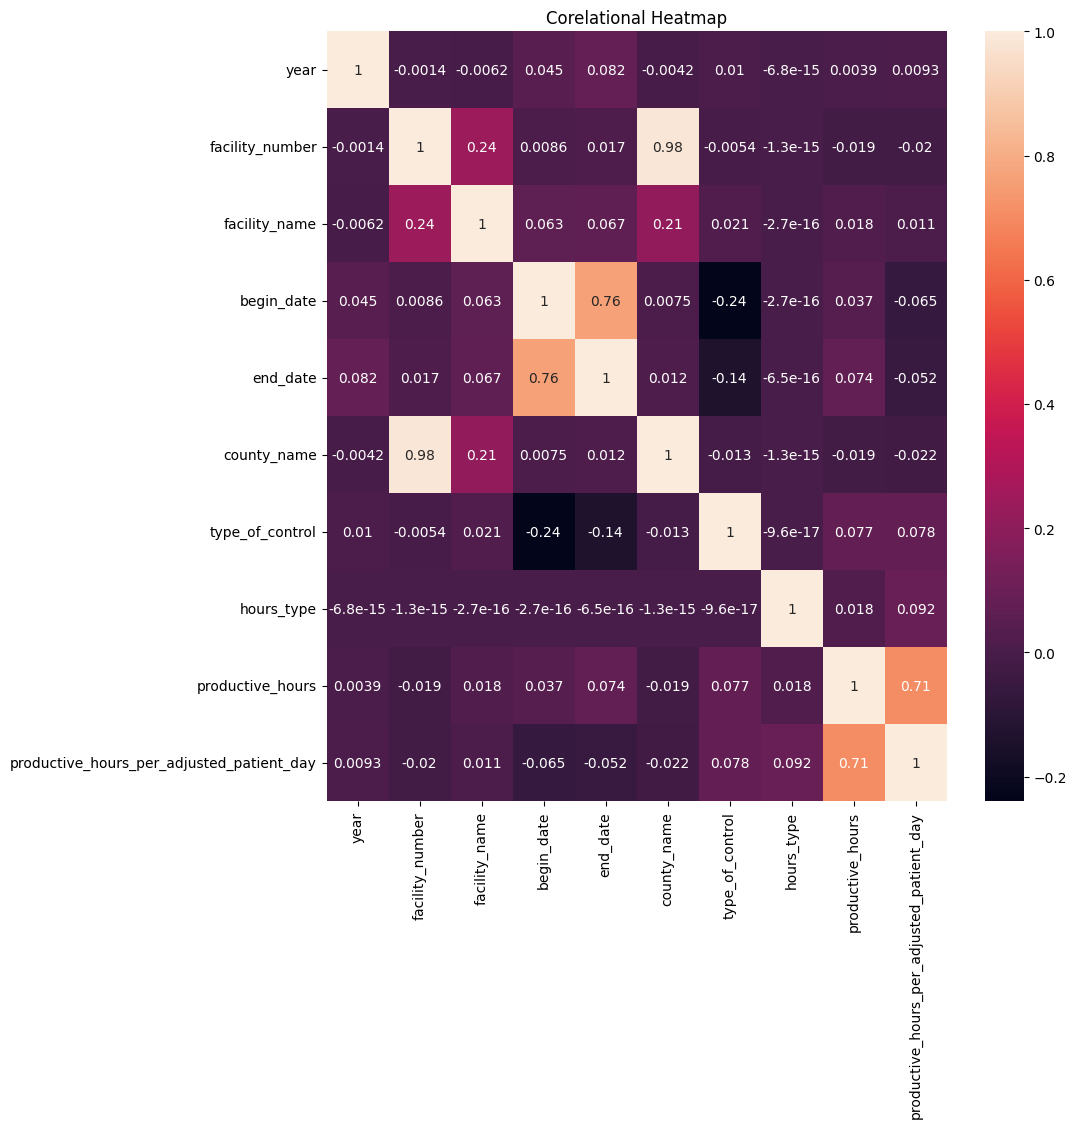

In [34]:
# calculate the correlational matrix
correlational_matrix = df.corr()

# heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(correlational_matrix, annot=True)
plt.title("Corelational Heatmap")
plt.show()

In [35]:
# split data into a features (x) and target variable (y)
x = df.drop('productive_hours_per_adjusted_patient_day', axis =1)
y = df['productive_hours_per_adjusted_patient_day']

In [36]:
# spliting dataset
from sklearn.model_selection import train_test_split

In [37]:
# spllit data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2, random_state = 42)

print('x_train shape :', x_train.shape)
print('y_train shape :', y_train.shape)
print('x_test shape :', x_test.shape)
print('y_test shape :', y_test.shape)

x_train shape : (29865, 9)
y_train shape : (29865,)
x_test shape : (7467, 9)
y_test shape : (7467,)


In [38]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lr = LinearRegression()

# Train the model using the training sets 
lr.fit(x_train, y_train)

LinearRegression()

In [39]:
# Value of y intercept
lr.intercept_

23.308706535442752

In [40]:
# Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([x_train.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,year,3.529276
1,facility_number,0.270816
2,facility_name,0.010002
3,begin_date,-0.437581
4,end_date,-2.216171
5,county_name,-2.908008
6,type_of_control,0.732287
7,hours_type,5.78918
8,productive_hours,0.027761


In [41]:
# Predicting Test data with the model
y_pred = lr.predict(x_test)

In [42]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse =np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("MAE : ", mae)
print("MSE : ", mse)
print("R2 : ", r2)
print('RMSE:', rmse)

MAE :  161.54316037571752
MSE :  60475.17625367651
R2 :  0.5201810294543089
RMSE: 245.91701090749396


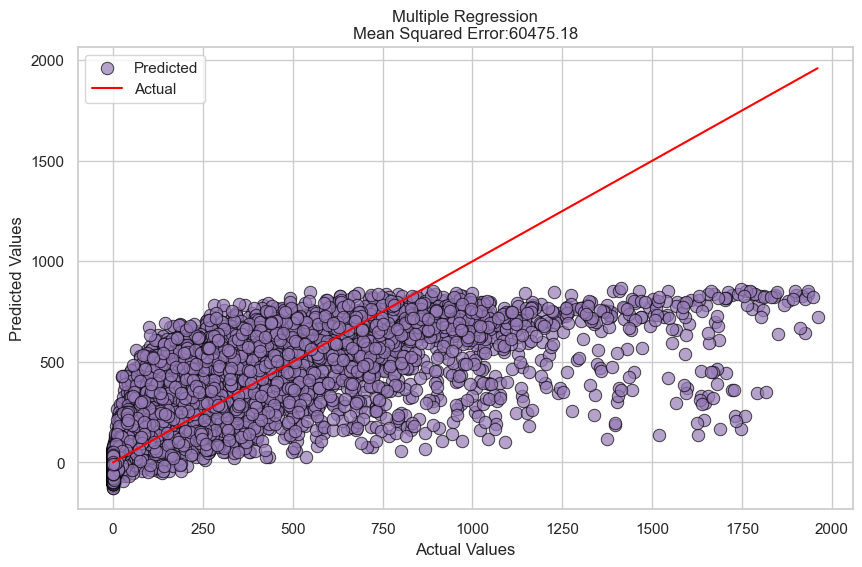

In [43]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))

# plot the true values
sns.scatterplot(x = y_test, y = y_pred, color = "#967bb6", label = "Predicted", s= 80, edgecolor = 'black', alpha=0.7)

# plot the regression line
sns.lineplot(x = y_test, y = y_test, color = "red", label = 'Actual')
plt.title(f'Multiple Regression\nMean Squared Error:{mse:.2f}')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [135]:
trainresiduals = y_train  - lr.predict(x_train)
trainresiduals

22239    -17.976221
8085    -140.970402
32269   -245.027512
4166    -119.664316
12125     82.698804
            ...    
16969    -89.314900
6310      -2.439724
11380     67.722221
880      308.356312
15914    769.785737
Name: productive_hours_per_adjusted_patient_day, Length: 29865, dtype: float64

In [136]:
testresiduals = y_test - lr.predict(x_test)
testresiduals

15844    -464.396949
2589     -283.587054
19152      46.230668
34939     -93.055513
5202       50.936264
            ...     
14372      59.863265
4370       14.993825
27294    -167.238661
18661    1468.008345
34914       9.596005
Name: productive_hours_per_adjusted_patient_day, Length: 7467, dtype: float64

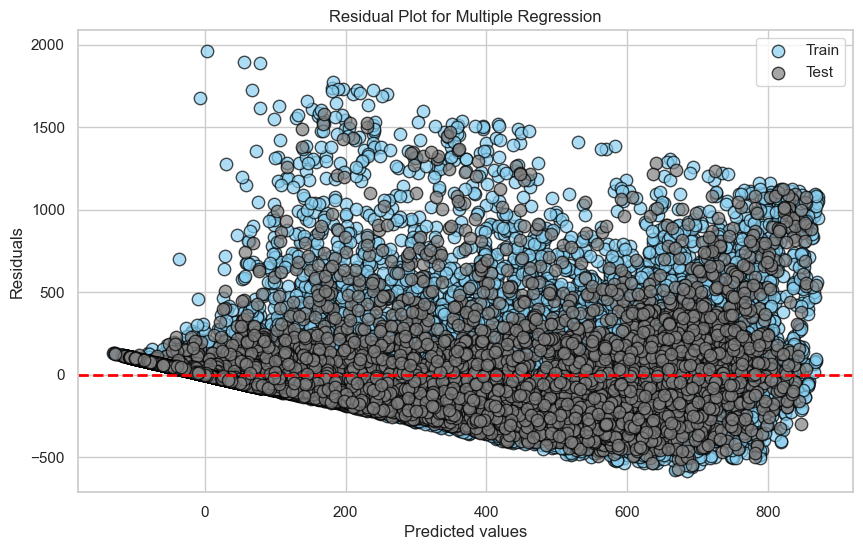

In [137]:
plt.figure(figsize = (10,6))
plt.scatter(lr.predict(x_train), trainresiduals, c= '#89cff0', label= 'Train', edgecolor = 'black',s=80, alpha=0.7)
plt.scatter(lr.predict(x_test), testresiduals, c= '#808080', label= 'Test', edgecolor = 'black', s=80, alpha=0.7)
plt.axhline(y=0 , color='red', linestyle= '--', linewidth = 2)
plt.title('Residual Plot for Multiple Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [306]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rfmreg = RandomForestRegressor(n_estimators = 100, random_state = 42)

# Train the model using the training sets 
rfmreg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [307]:
# Model prediction on train data
y_pred =rfmreg.predict(x_test)

In [308]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse =np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("MAE : ", mae)
print("MSE : ", mse)
print("R2 : ", r2)
print('RMSE:', rmse)

MAE :  41.76198071514665
MSE :  7851.5180153073525
R2 :  0.9377048977001254
RMSE: 88.6087919752174


In [309]:
predicted= rfmreg.predict([[0,19,5,49,44,1,3,14,1872]])
print(predicted)

[38.66]


C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


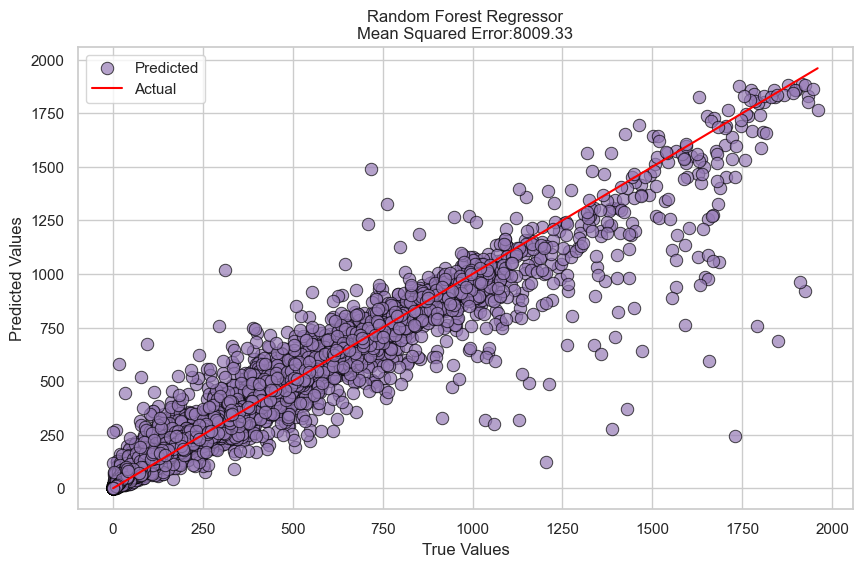

In [141]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))

# plot the true values
sns.scatterplot(x = y_test, y = y_pred, color = "#967bb6", label = "Predicted", s= 80, edgecolor = 'black', alpha=0.7)

# plot the regression line
sns.lineplot(x = y_test, y = y_test, color = "red", label = 'Actual')
plt.title(f'Random Forest Regressor\nMean Squared Error:{mse:.2f}')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [142]:
trainresiduals = y_train  - lr.predict(x_train)
trainresiduals

22239    -17.976221
8085    -140.970402
32269   -245.027512
4166    -119.664316
12125     82.698804
            ...    
16969    -89.314900
6310      -2.439724
11380     67.722221
880      308.356312
15914    769.785737
Name: productive_hours_per_adjusted_patient_day, Length: 29865, dtype: float64

In [143]:
testresiduals = y_test - lr.predict(x_test)
testresiduals

15844    -464.396949
2589     -283.587054
19152      46.230668
34939     -93.055513
5202       50.936264
            ...     
14372      59.863265
4370       14.993825
27294    -167.238661
18661    1468.008345
34914       9.596005
Name: productive_hours_per_adjusted_patient_day, Length: 7467, dtype: float64

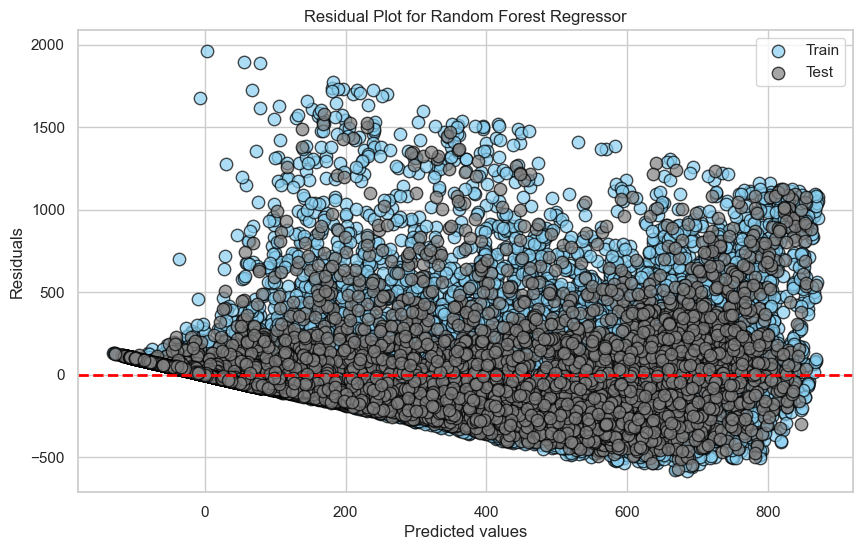

In [144]:
plt.figure(figsize = (10,6))
plt.scatter(lr.predict(x_train), trainresiduals, c= '#89cff0', label= 'Train', edgecolor = 'black',s=80, alpha=0.7)
plt.scatter(lr.predict(x_test), testresiduals, c= '#808080', label= 'Test', edgecolor = 'black', s=80, alpha=0.7)
plt.axhline(y=0 , color='red', linestyle= '--', linewidth = 2)
plt.title('Residual Plot for Random Forest Regressor')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [145]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svmreg = svm.SVR()

In [146]:
# Train the model using the training sets 
svmreg.fit(x_train, y_train)

SVR()

In [147]:
# Model prediction on train data
y_pred = svmreg.predict(x_test)

In [148]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse =np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("MAE : ", mae)
print("MSE : ", mse)
print("R2 : ", r2)
print('RMSE:', rmse)

MAE :  139.5019946103365
MSE :  63417.942256302005
R2 :  0.4968326898312262
RMSE: 251.82919262131227


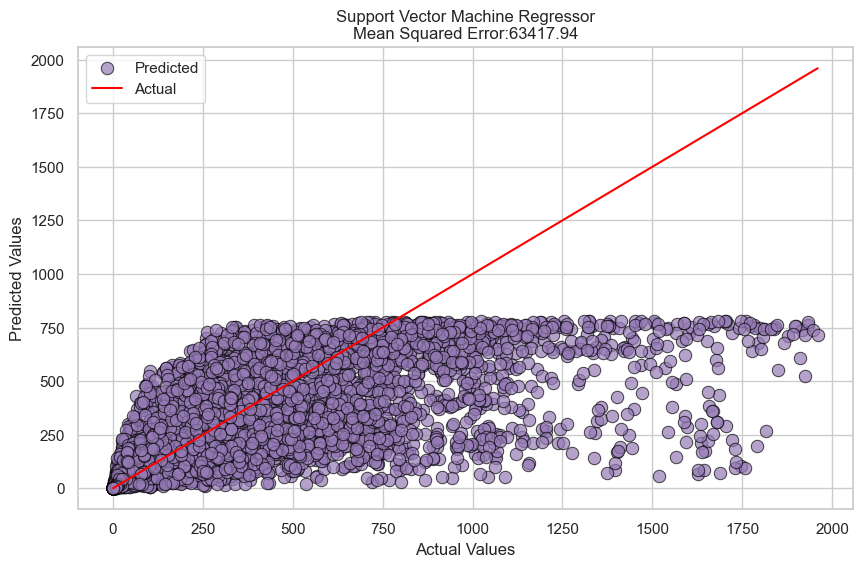

In [149]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10,6))

# plot the true values
sns.scatterplot(x = y_test, y = y_pred, color = "#967bb6", label = "Predicted", s= 80, edgecolor = 'black', alpha=0.7)

# plot the regression line
sns.lineplot(x = y_test, y = y_test, color = "red", label = 'Actual')
plt.title(f'Support Vector Machine Regressor\nMean Squared Error:{mse:.2f}')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [150]:
trainresiduals = y_train  - lr.predict(x_train)
trainresiduals

22239    -17.976221
8085    -140.970402
32269   -245.027512
4166    -119.664316
12125     82.698804
            ...    
16969    -89.314900
6310      -2.439724
11380     67.722221
880      308.356312
15914    769.785737
Name: productive_hours_per_adjusted_patient_day, Length: 29865, dtype: float64

In [151]:
testresiduals = y_test - lr.predict(x_test)
testresiduals

15844    -464.396949
2589     -283.587054
19152      46.230668
34939     -93.055513
5202       50.936264
            ...     
14372      59.863265
4370       14.993825
27294    -167.238661
18661    1468.008345
34914       9.596005
Name: productive_hours_per_adjusted_patient_day, Length: 7467, dtype: float64

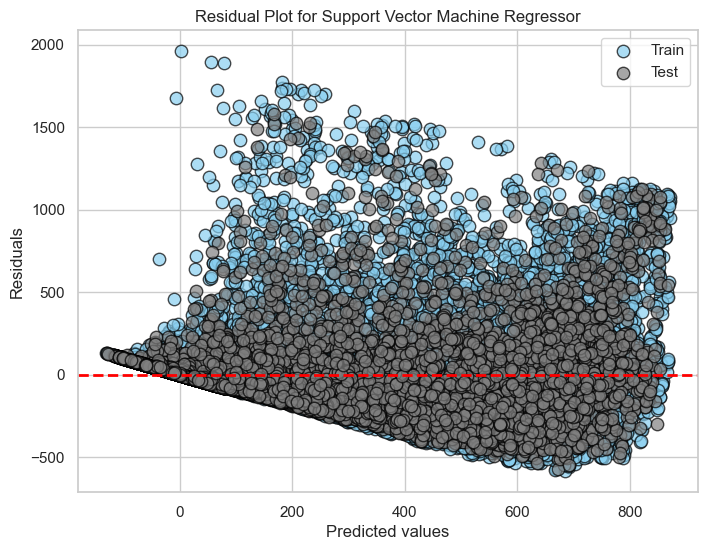

In [152]:
plt.figure(figsize = (8,6))
plt.scatter(lr.predict(x_train), trainresiduals, c= '#89cff0', label= 'Train', edgecolor = 'black',s=80, alpha=0.7)
plt.scatter(lr.predict(x_test), testresiduals, c= '#808080', label= 'Test', edgecolor = 'black', s=80, alpha=0.7)
plt.axhline(y=0 , color='red', linestyle= '--', linewidth = 2)
plt.title('Residual Plot for Support Vector Machine Regressor')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [153]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest',  'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,93.645276
0,Linear Regression,52.018103
2,Support Vector Machines,49.683269
